# **Lab 4 : CLUSTERING Part 1**

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme ='gruvboxd',context='notebook',grid=False,ticks=True)

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

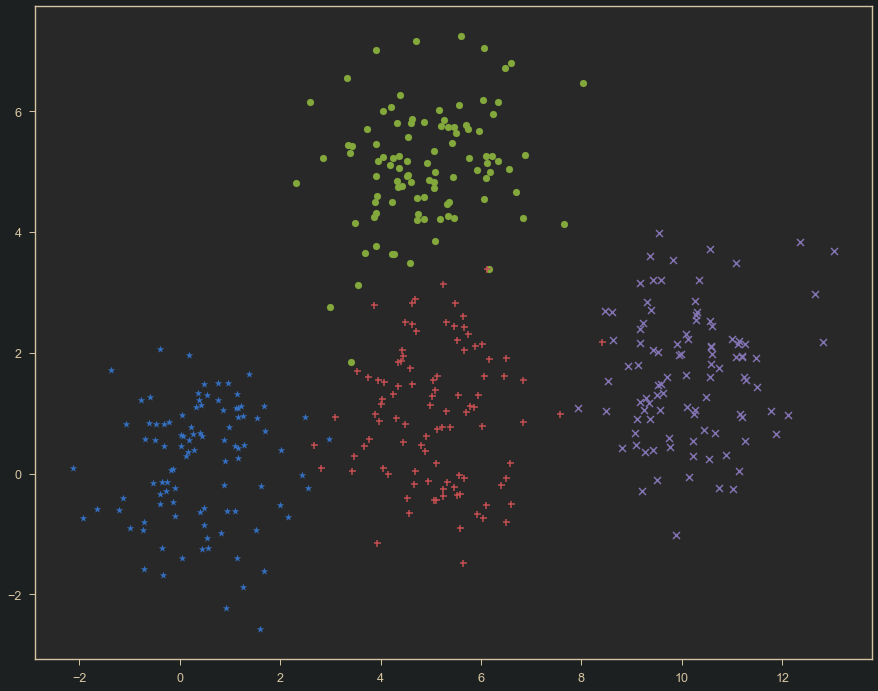

In [2]:
# write your code here
# means and var of gauss
mean_mat = np.array([[0.5, 0],[5, 5],[5, 1],[10, 1.5]]);
var_mat = np.array([[1,1],[1,1],[1,1],[1,1]]);
# defining X 2d array
X = np.array([[],[]]);
# loop to generate X
for i in range(4):
    mean = mean_mat[i,:];
    cov = np.array([[var_mat[i,0],0],[0,var_mat[i,1]]]);
    x1,x2 = np.random.multivariate_normal(mean, cov, 100).T;
    X = np.append(X,np.array([x1,x2]),axis=1);
#plots
plt.figure(figsize=(15,12))
mrkr = ['*','o','+','x']
for i in range(4):
    plt.scatter(X[0,100*i:100*i+99],X[1,100*i:100*i+99],marker=mrkr[i])

**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

[[-0.34602943 -0.13881586]
 [ 3.42000774  1.84935393]
 [ 4.89404484  0.38042011]
 [ 4.74645594  4.30505807]]


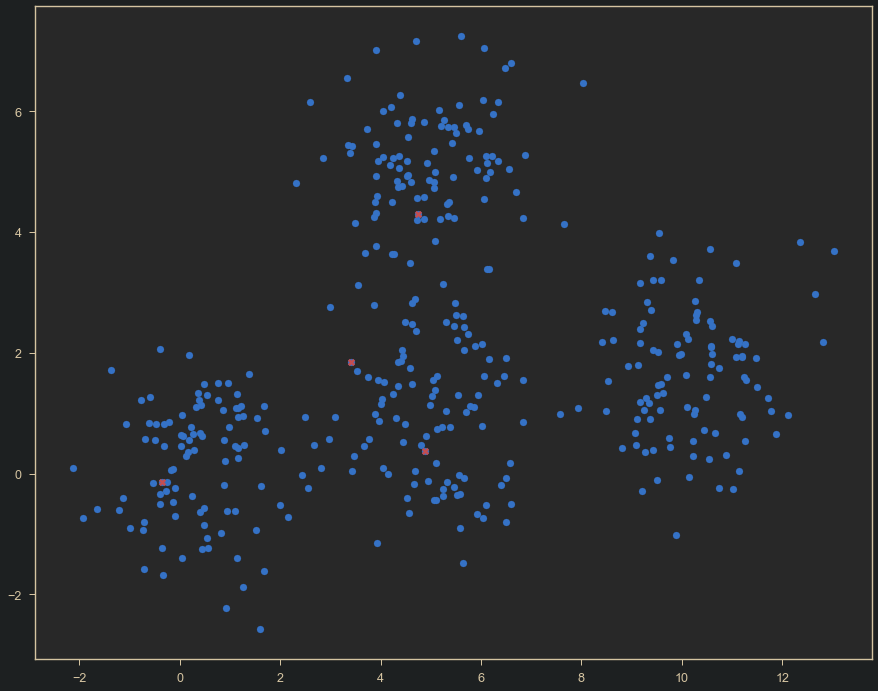

In [3]:
# write your code here
# random index to choose points
idx = np.random.randint(0,400,4);
# centers of clusters
center = np.array([[X[0,idx[0]],X[0,idx[1]],X[0,idx[2]],X[0,idx[3]]],
                   [X[1,idx[0]],X[1,idx[1]],X[1,idx[2]],X[1,idx[3]]]]);
print(center.T)
# plots
plt.figure(figsize=(15,12));
plt.scatter(X[0,:],X[1::]);
plt.scatter(center[0,:],center[1,:],color='r',marker='X');

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

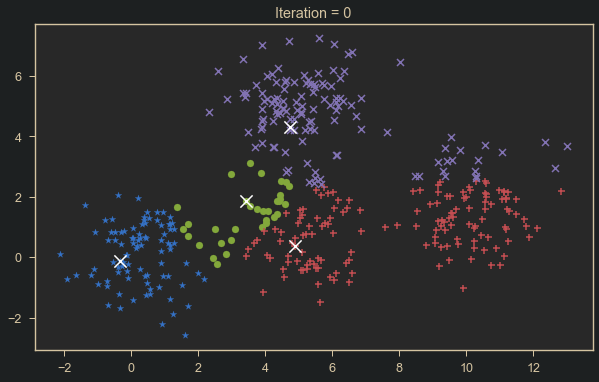

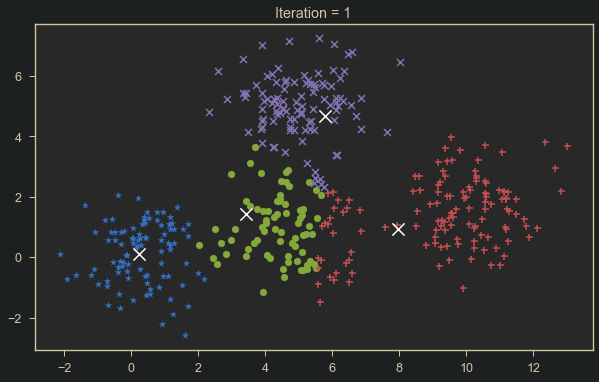

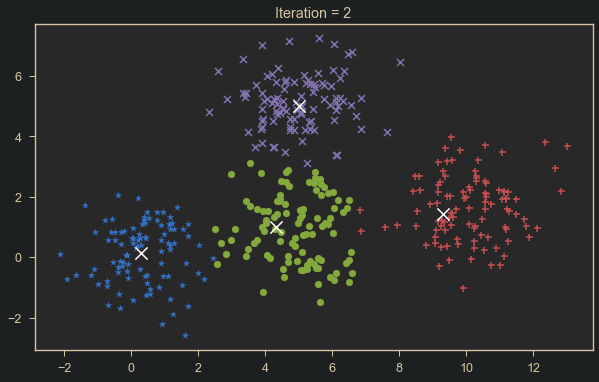

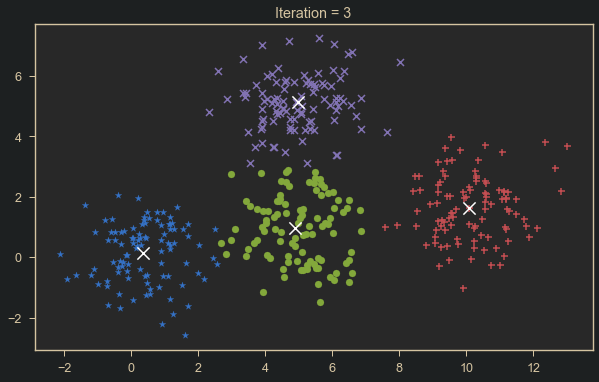

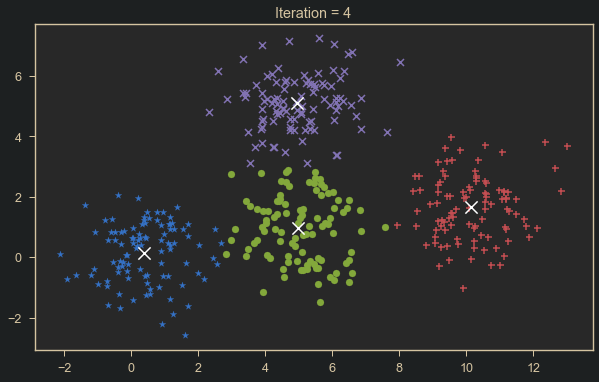

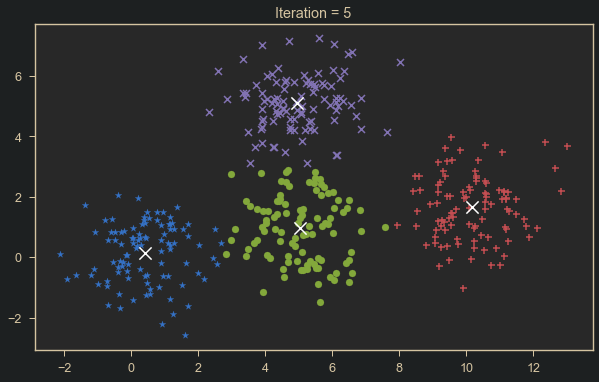

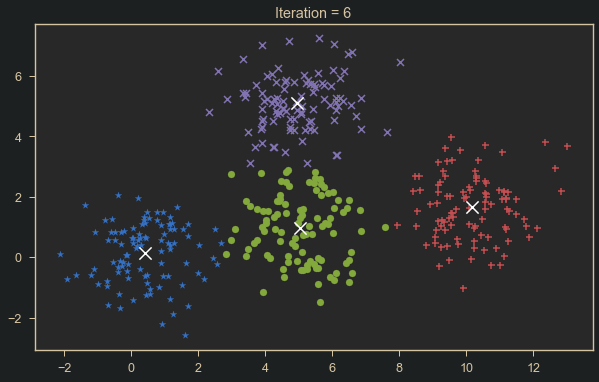

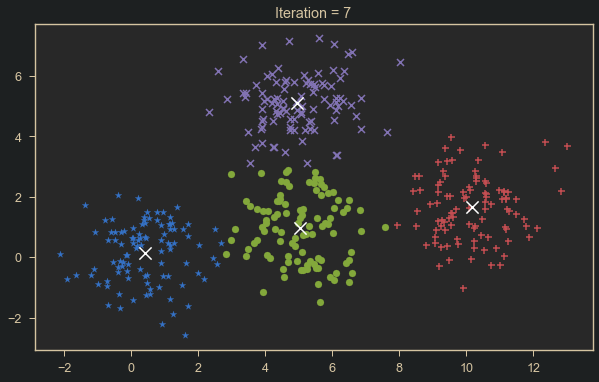

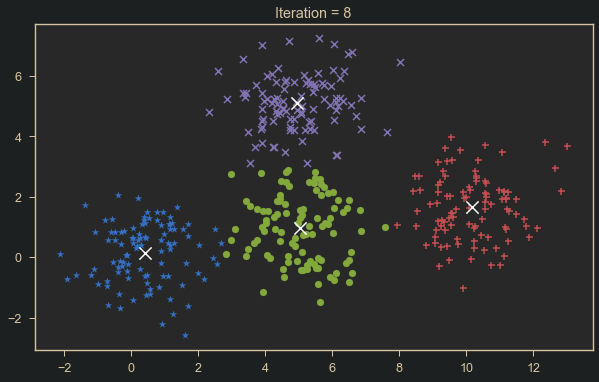

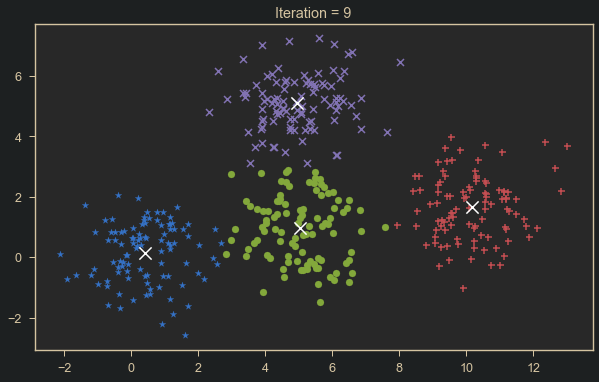

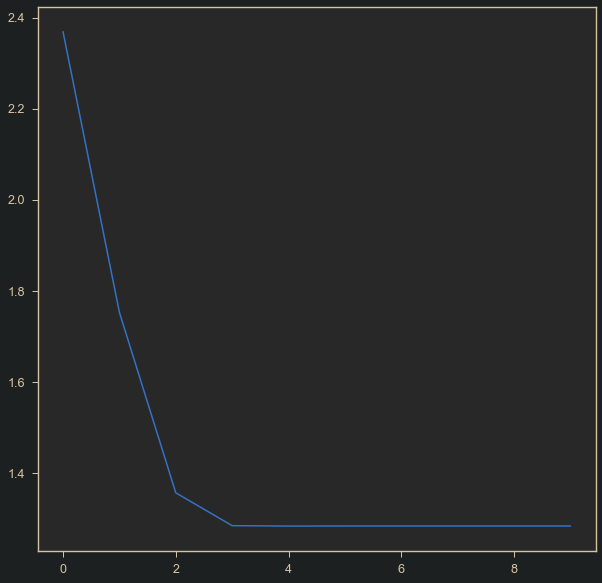

In [4]:
# write your code here
#defining error history
error = [];
# iterating over 10 steps
for iter in range(10):
    # cluster dictionary
    clusters = {
        "1" : [[],[]],
        "2" : [[],[]],
        "3" : [[],[]],
        "4" : [[],[]],
    }
    # distance array
    dist = np.empty((0,400),int);
    # looping over clusters
    for i in range(4):
        # storing distances
        dist=np.append(dist,[(X[0,:]-center[0,i])**2+(X[1,:]-center[1,i])**2],axis=0);
    # finding min distance
    min_dist = np.amin(dist,axis=0);
    # appending errors
    error = np.append(error,np.mean(np.sqrt(min_dist)));
    # index of cluster with min distance
    min_idx = np.argmin(dist,axis=0);
    # looping and storing points to clusters
    for i in range(len(min_idx)):
        clusters[str(min_idx[i]+1)] = np.append(clusters[str(min_idx[i]+1)],np.array([[X[0,i]],[X[1,i]]]),axis=1);
    #plots
    plt.figure(figsize=(10,6));
    mrkr = ['*','o','+','x'];
    for i in range(4):
        plt.scatter(clusters[str(i+1)][0,:],clusters[str(i+1)][1,:],marker=mrkr[i]);
    plt.scatter(center[0,:],center[1,:],marker='x',color='white',s=150);
    plt.title('Iteration = '+str(iter));
    # updating centers of clusters
    for i in range(4):
        center[:,i] = np.mean(clusters[str(i+1)],axis=1);
plt.figure(figsize=(10,10));
plt.plot(error);

**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [5]:
# write your code here
# defining ax and bx
ax = [];
bx = [];
# looping over clusters
for i in range(4):
    # looping over points in i'th cluster
    for cl in range(len(clusters[str(i+1)][0,:])):
        # distance intra cluster
        ax = np.append(ax,np.mean(np.sqrt([(clusters[str(i+1)][0,:]-clusters[str(i+1)][0,cl])**2+
                                           (clusters[str(i+1)][1,:]-clusters[str(i+1)][1,cl])**2])));
        # distance inter cluster
        bx_temp = [];
        # avg distance of selected point from all points in other clusters
        bx_temp.append(np.mean(np.sqrt((clusters[str((1+i)%4+1)][0,:]-clusters[str(i+1)][0,cl])**2+
                                       (clusters[str((1+i)%4+1)][1,:]-clusters[str(i+1)][1,cl])**2)));
        bx_temp.append(np.mean(np.sqrt((clusters[str((2+i)%4+1)][0,:]-clusters[str(i+1)][0,cl])**2+
                                       (clusters[str((2+i)%4+1)][1,:]-clusters[str(i+1)][1,cl])**2)));
        bx_temp.append(np.mean(np.sqrt((clusters[str((3+i)%4+1)][0,:]-clusters[str(i+1)][0,cl])**2+
                                       (clusters[str((3+i)%4+1)][1,:]-clusters[str(i+1)][1,cl])**2)));
        # storing min of distances
        bx = np.append(bx,np.min(bx_temp));
# calculating sx SC
sx = (bx-ax)/np.maximum(ax,bx);
SC = np.mean(sx);
print(f'Silhouette Score: {SC}');

Silhouette Score: 0.594280477631106


# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

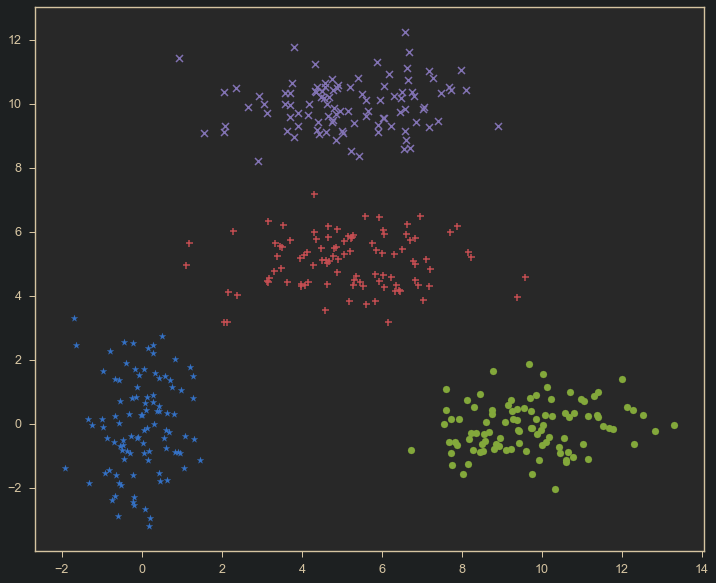

In [6]:
# write your code here
# means and var of gauss
mean_mat = np.array([[0, 0],[10, 0],[5, 5],[5, 10]]);
var_mat = np.array([[0.5,2],[2,0.5],[3,0.5],[3,0.5]]);
# defining data 2d array
data = np.array([[],[]]);
# loop to generate data
for i in range(4):
    mean = mean_mat[i,:];
    cov = np.array([[var_mat[i,0],0],[0,var_mat[i,1]]]);
    x1,x2 = np.random.multivariate_normal(mean, cov, 100).T;
    data = np.append(data,np.array([x1,x2]),axis=1);
#plots
plt.figure(figsize=(12,10))
mrkr = ['*','o','+','x']
for i in range(4):
    plt.scatter(data[0,100*i:100*i+99],data[1,100*i:100*i+99],marker=mrkr[i])

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [7]:
def initialization(data,K):

    # write your code here
    # declaring a random index array of length K between 0 and no of pts in data
    idx = np.random.randint(0,len(data[0,:]),K);
    # dictionary of theta
    theta ={
        'means' : np.empty((0,2)),
        'cov' : np.empty((0,2,2)),
        'weights' : np.ones((1,K))/K
    }
    # looping to store means and cov
    for i in idx:
        theta['means'] = np.append(theta['means'],[[data[0,i],data[1,i]]],axis=0); # randomly chosen K points
        theta['cov'] = np.append(theta['cov'],[[[1,0],[0,1]]],axis=0);
    return theta

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [8]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):

    # write your code here
    p = np.empty((0,len(data[0,:])));
    responsibility = [[],[]];
    # finning prob for each point belonging to clusters
    for k in range(K):
        p = np.append(p,[multivariate_normal.pdf(data.T,mean=theta['means'][k,:],cov=theta['cov'][k,:,:])],axis=0);
#         print(p.shape)
    p = p.T;
#     print(p.shape)
    # multiplying by weight and normalising
    responsibility = (p*theta['weights'])/np.sum(p*theta['weights'],axis=1,keepdims=True);
#     print(responsibility.shape)
    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [9]:
# M-STEP GMM

def M_Step_GMM(data,responsibility):
    
    # write your code here
    # decalring and updating
    Nk = np.sum(responsibility,axis=0,keepdims=True);
    N = float(data.shape[1]);
    # updating weights and means
    theta['weights'] = Nk/N;
    theta['means'] = (data@responsibility/Nk).T;
    # looping to get cov for each K
    for i in range(len(Nk)):
        theta['cov'][i,:,:] = ((responsibility[:,i].T)*(data-np.array([theta['means'][i,:]]).T))@(data.T-np.array([theta['means'][i,:]]))/Nk[0,i];
    p = np.empty((0,len(data[0,:])));
    # finding prob
    for k in range(Nk.shape[1]):
        p = np.append(p,[multivariate_normal.pdf(data.T,theta['means'][k,:],theta['cov'][k,:,:])],axis=0);
#         print(p.shape)
    p = p.T;
#     print(p.shape);
    # finding log likelihood
    log_likelihood = np.sum(np.log(np.sum(p*theta['weights'],axis=1)))
    return theta, log_likelihood
# M_Step_GMM(data,responsibility);

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

<ipython-input-10-d81a38e292e3>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,10))


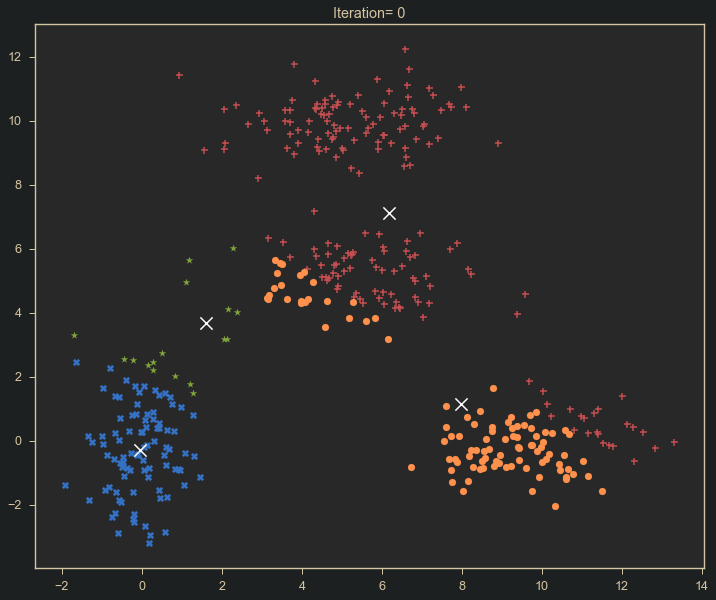

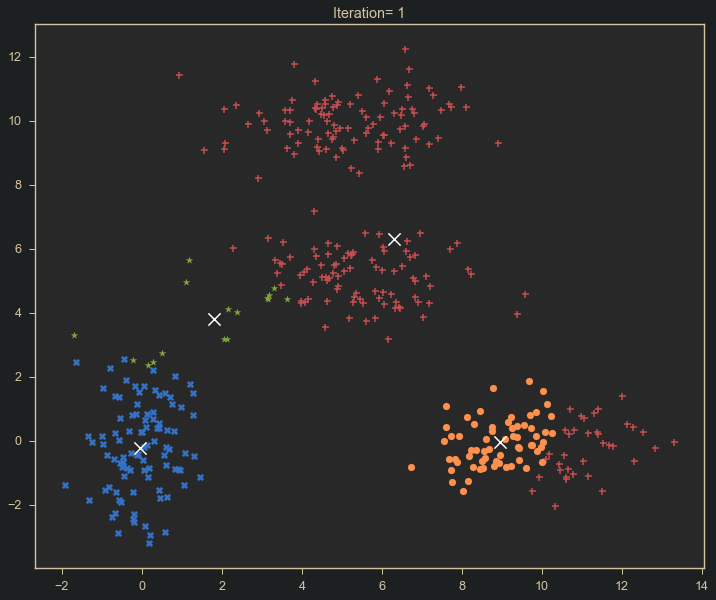

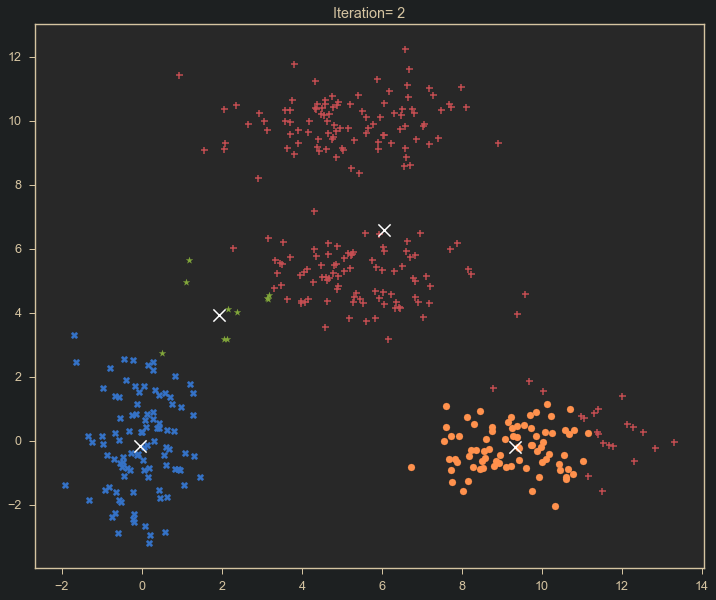

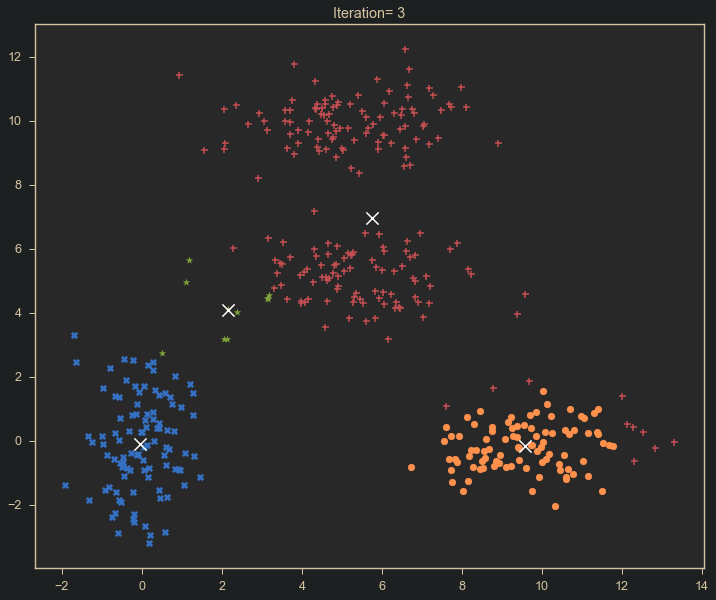

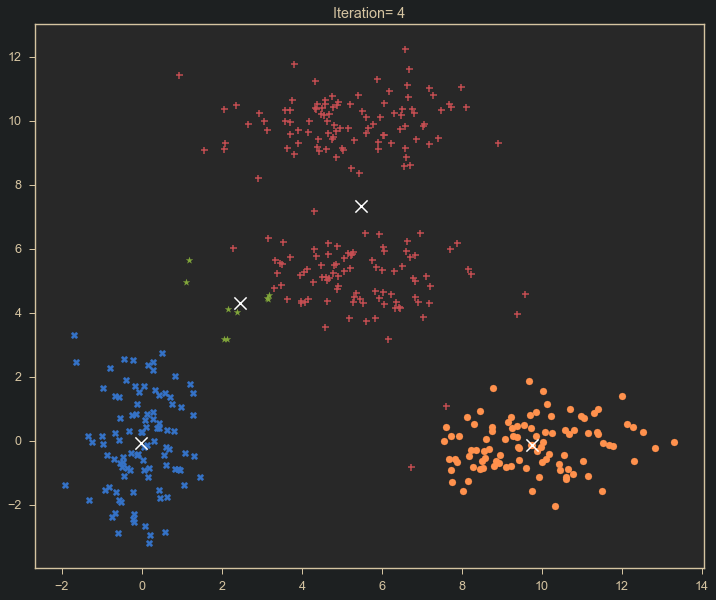

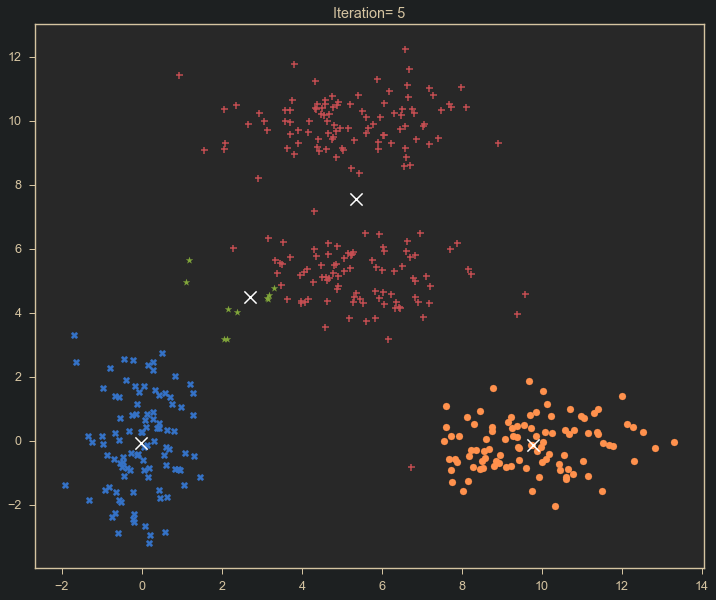

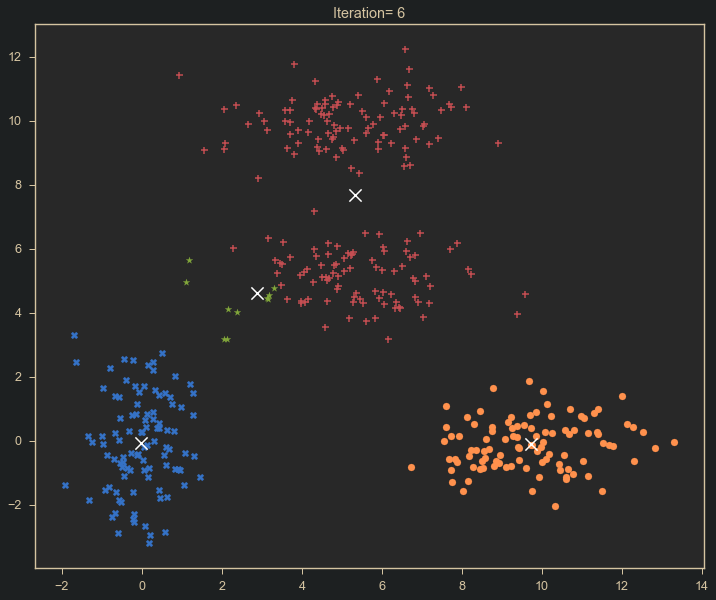

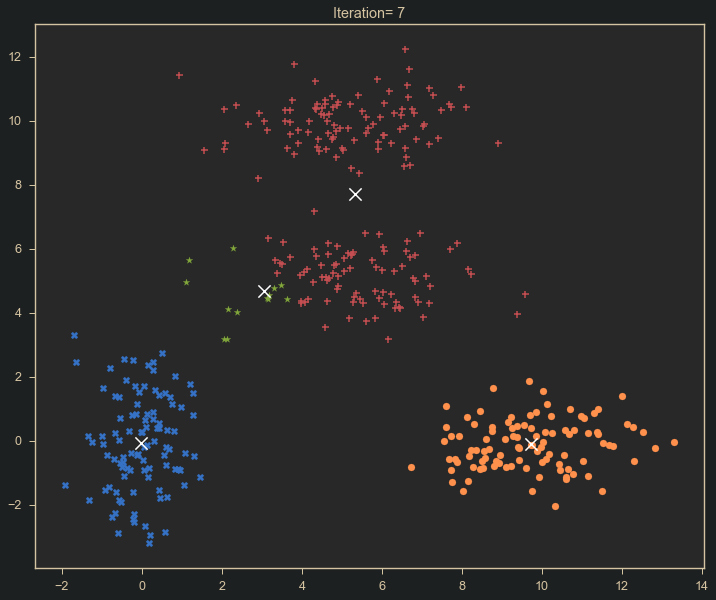

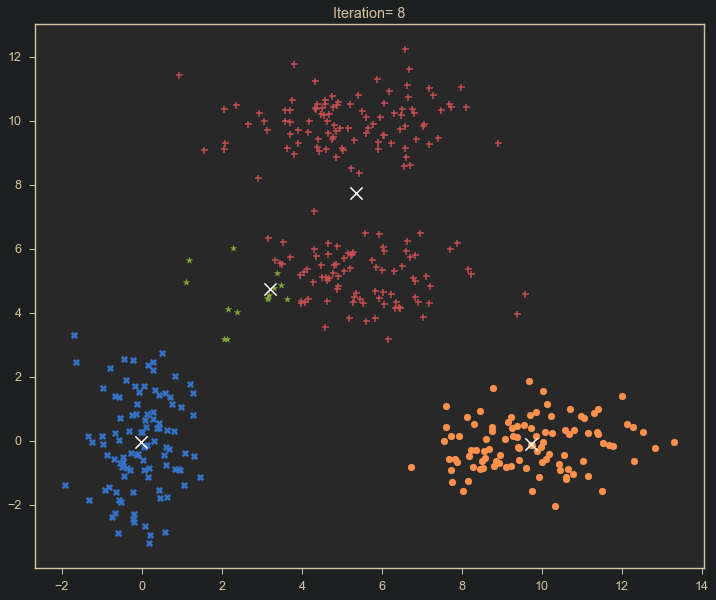

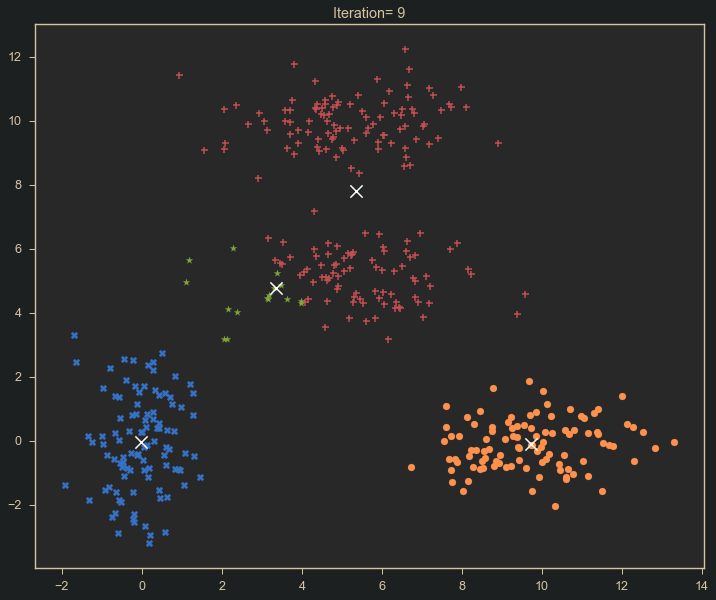

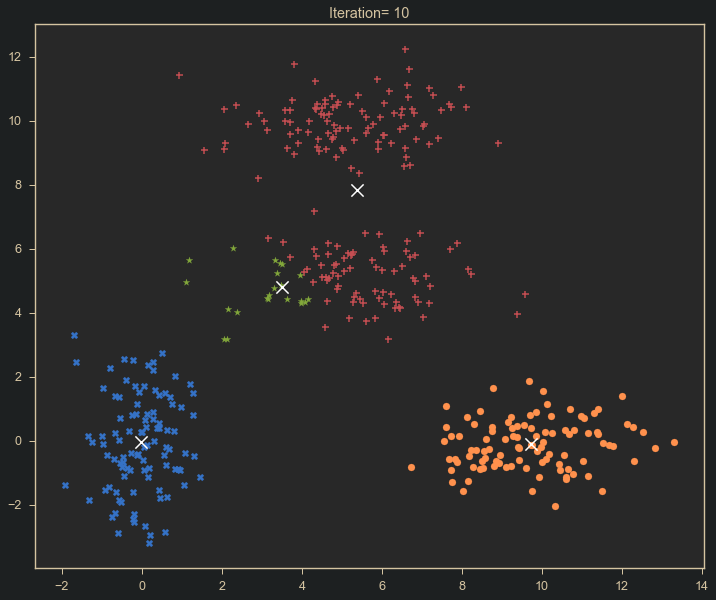

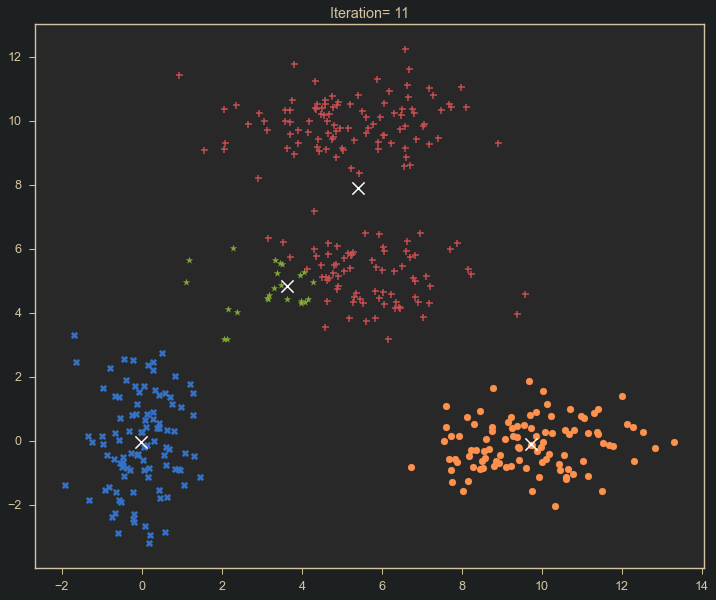

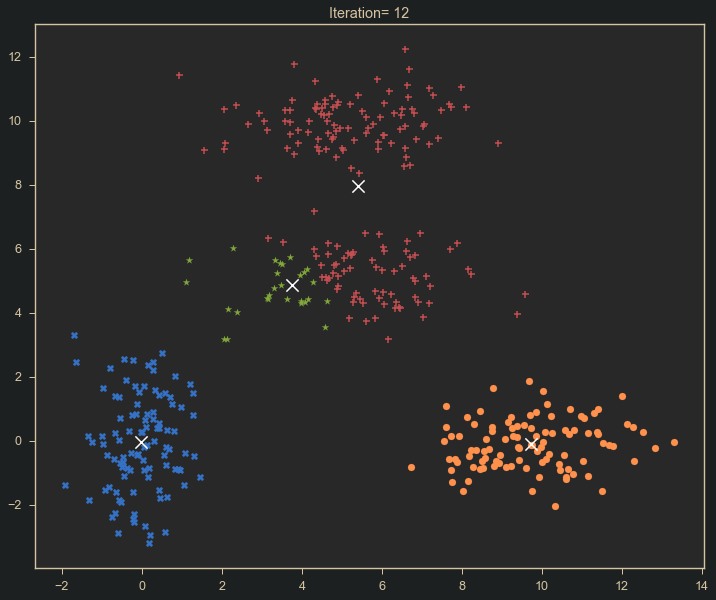

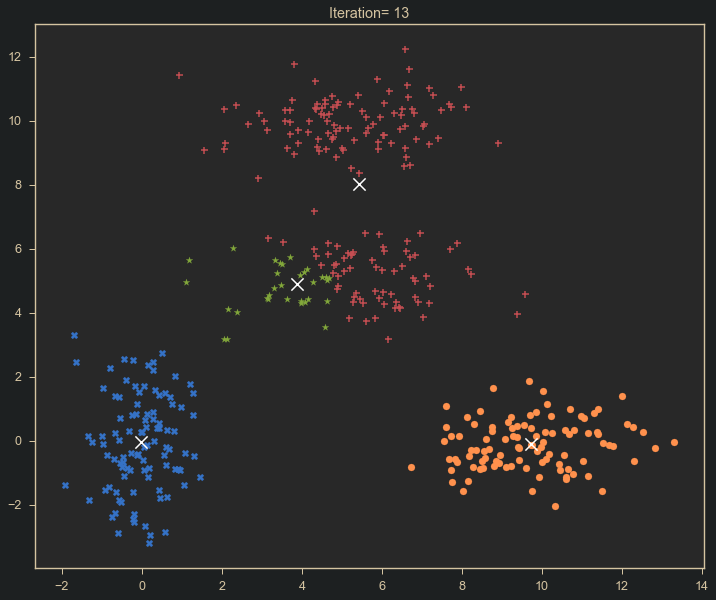

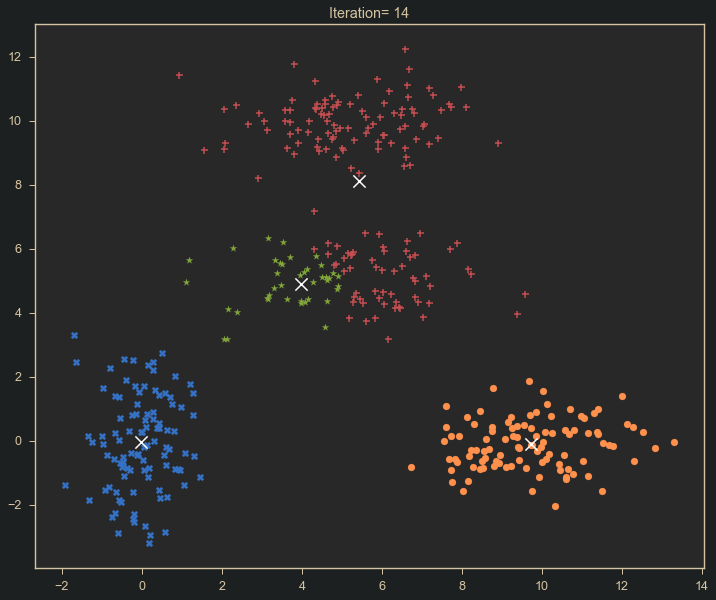

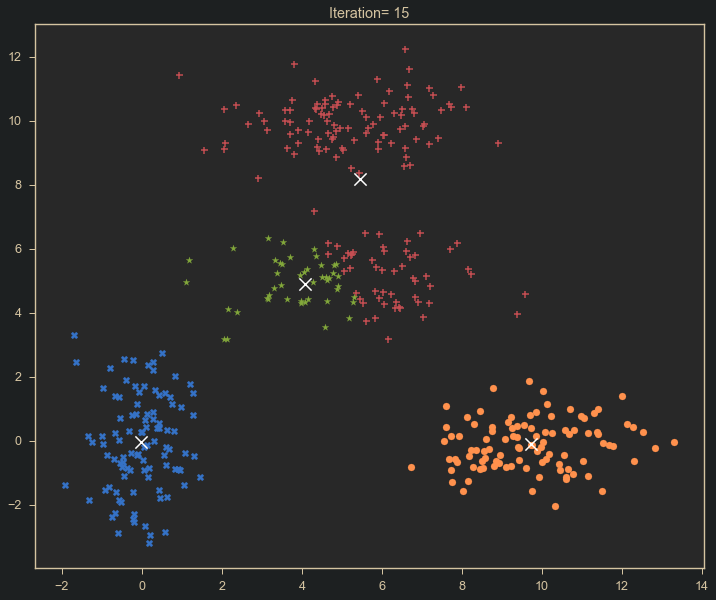

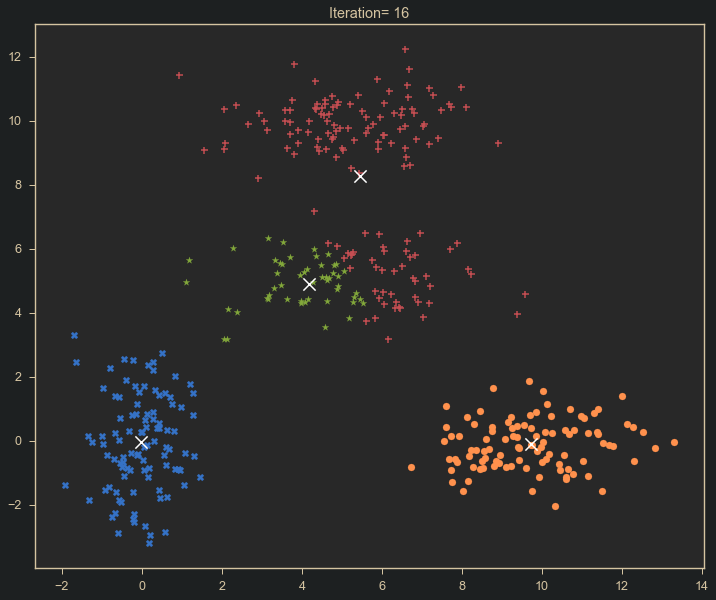

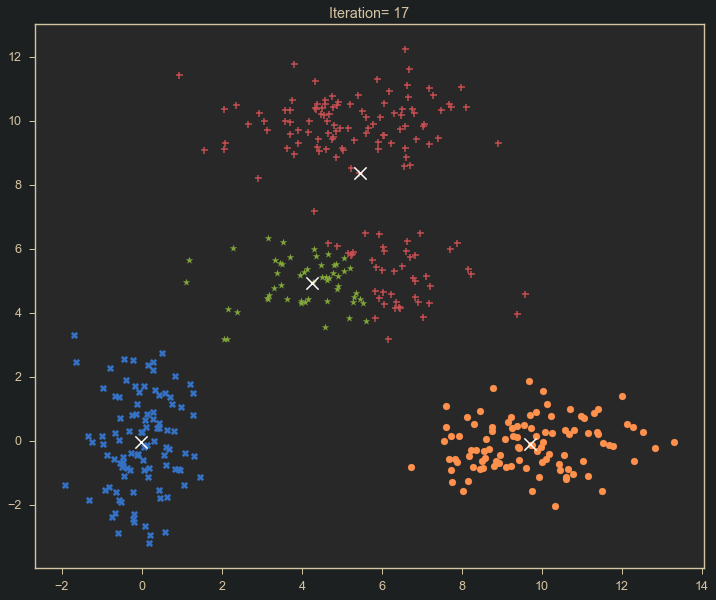

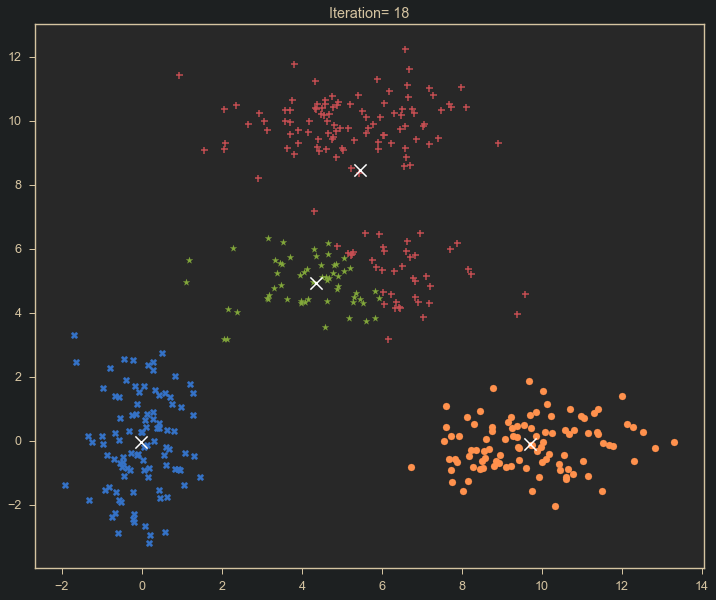

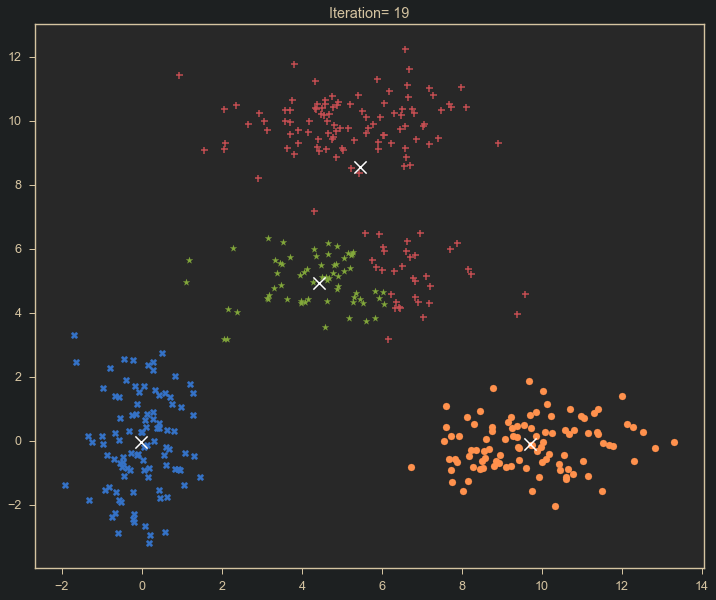

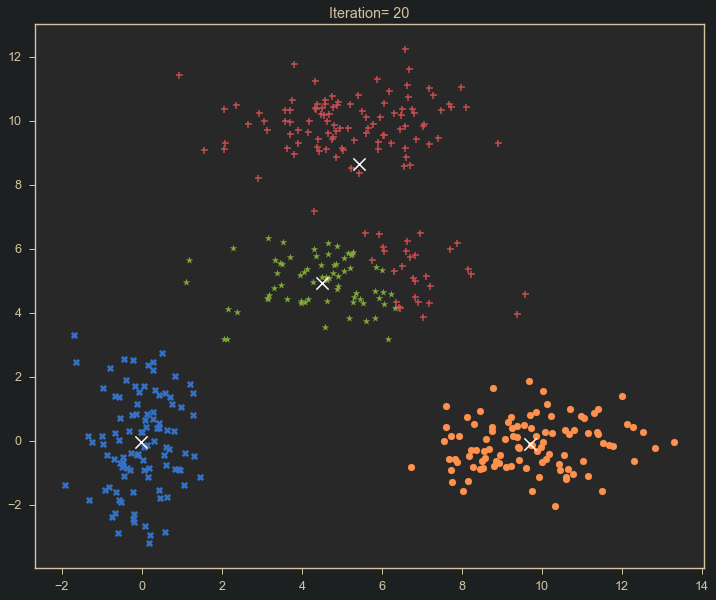

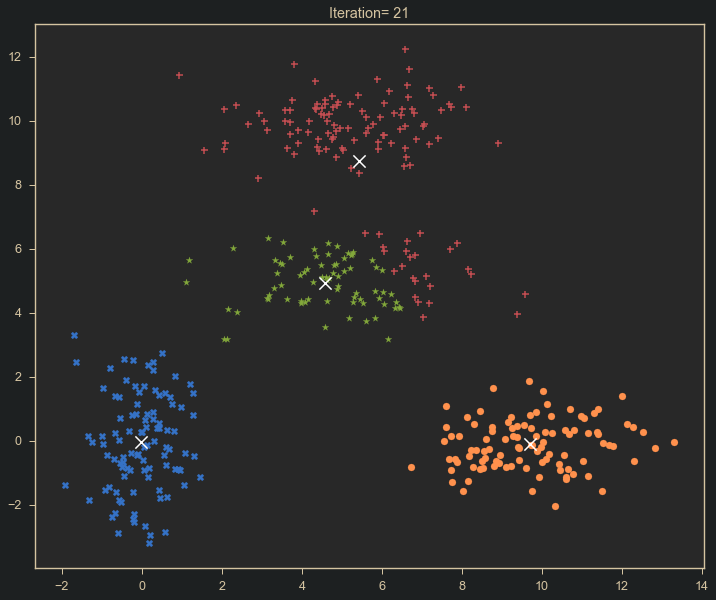

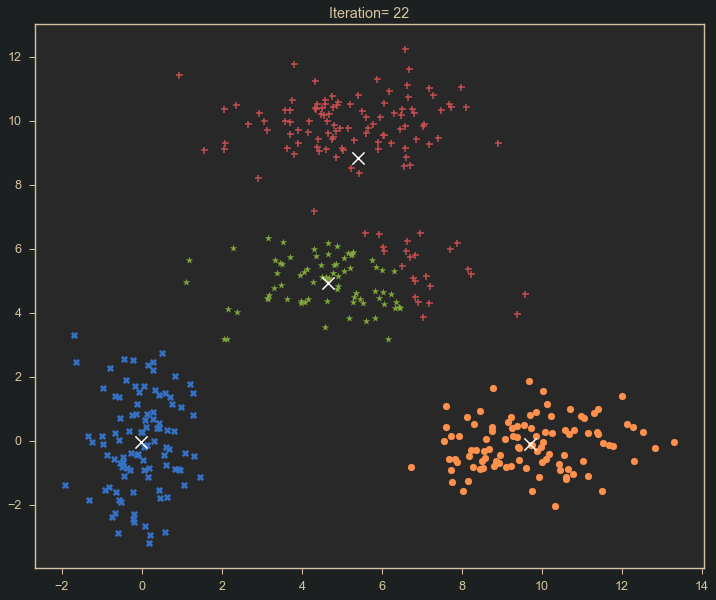

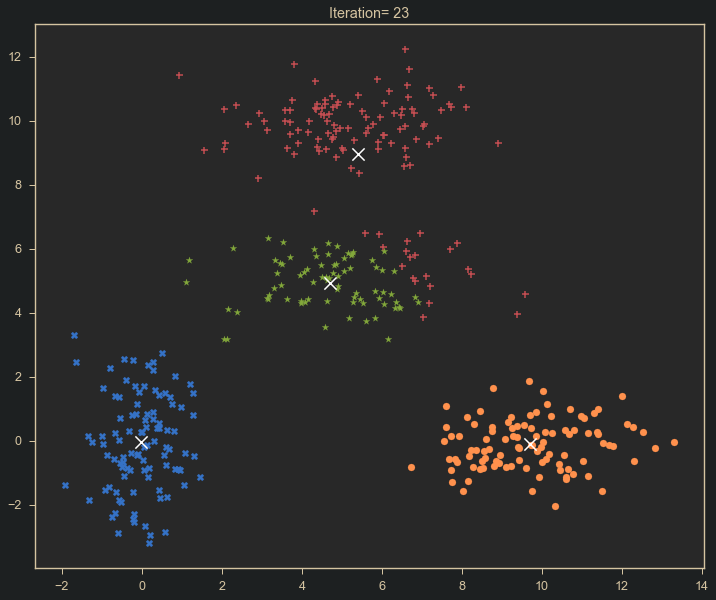

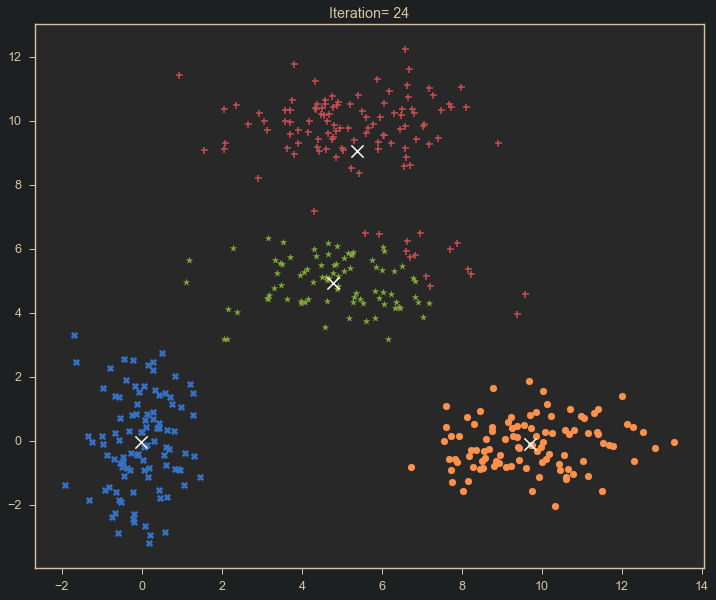

In [10]:
log_l=[]
Itr=25
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K = 4   # no. of clusters
# data = (StandardScaler().fit_transform(data.T)).T;
theta=initialization(data,K)
for n in range(Itr):

    responsibility=E_Step_GMM(data,K,theta)

    cluster_label=np.argmax(responsibility,axis=1) #Label Points
    
    theta,log_likhd=M_Step_GMM(data,responsibility)

    log_l.append(log_likhd)

    plt.figure(figsize=(12,10))
    for l in range(K):
        id=np.where(cluster_label==l)
        plt.scatter(data[0,id],data[1,id],color=clr[l],marker=mrk[l])
    Cents=theta['means']
    plt.scatter(Cents[:,0],Cents[:,1],marker='x',s=150,color='w');
    plt.title('Iteration= %d' % (n))
    
    if n>2:
        if abs(log_l[n]-log_l[n-1])<eps:
              break

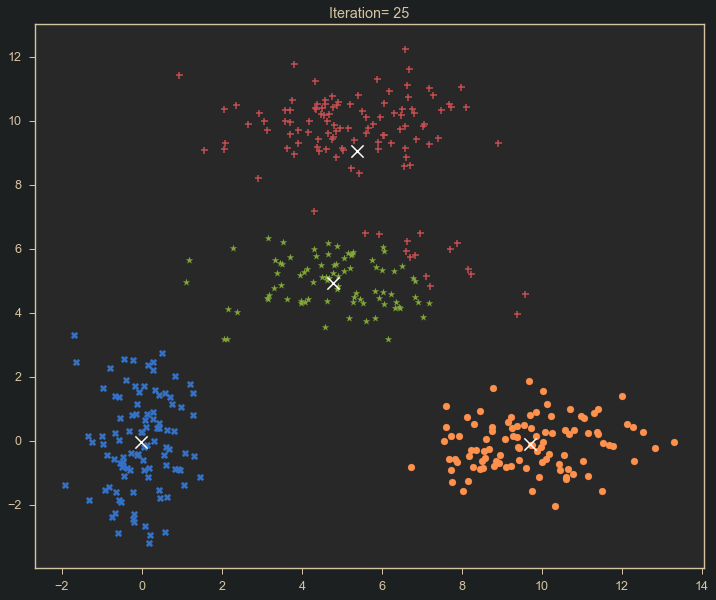

In [11]:
plt.figure(figsize=(12,10))
for l in range(K):
    id=np.where(cluster_label==l)
    plt.scatter(data[0,id],data[1,id],color=clr[l],marker=mrk[l])
Cents=theta['means']
plt.scatter(Cents[:,0],Cents[:,1],marker='x',s=150,color='w');
plt.title('Iteration= %d' % (Itr));

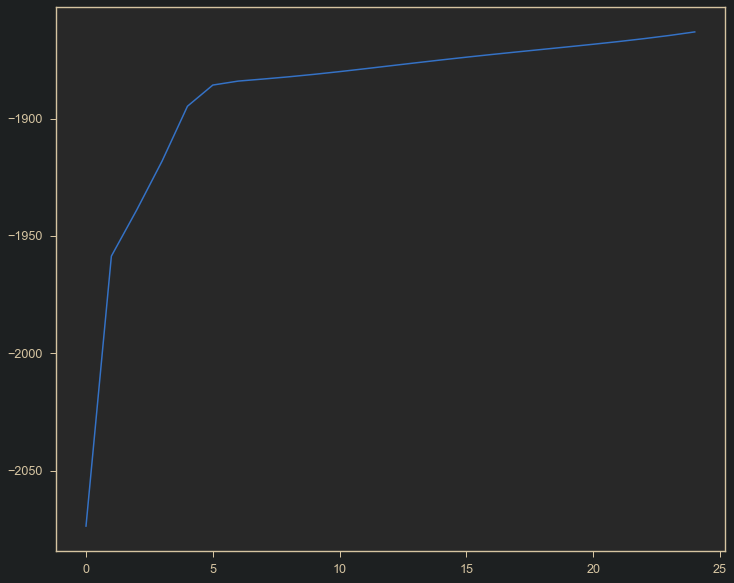

In [12]:
plt.figure(figsize=(12,10));  
plt.plot(log_l);

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [13]:
# write your code here
from sklearn.metrics import silhouette_score
print("Silhouette score : ",silhouette_score(data.T,cluster_label));

Silhouette score :  0.6040031293987274


# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

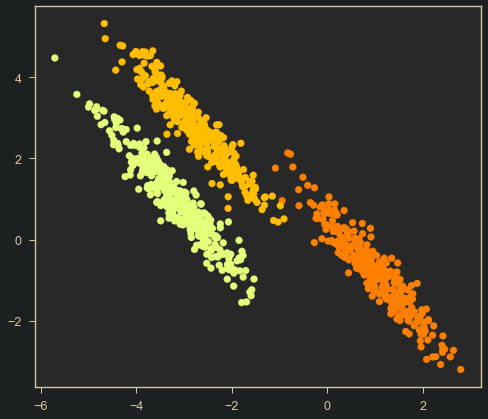

In [14]:
# write your code here
# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=1000, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)
plt.scatter(X[:,0],X[:,1],c=y,cmap='Wistia');

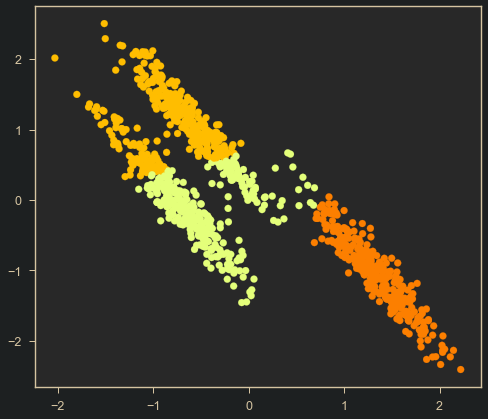

In [15]:
from sklearn.cluster import KMeans
X = StandardScaler().fit_transform(X);
kmeans = KMeans(n_clusters=3).fit(X);
pred = kmeans.predict(X);
plt.scatter(X[:,0],X[:,1],c=pred,cmap='Wistia');

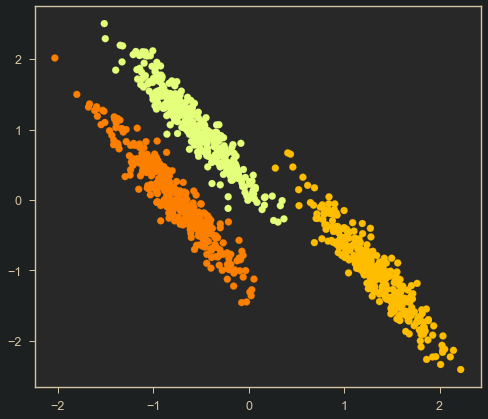

In [16]:
from sklearn.mixture import GaussianMixture
X = StandardScaler().fit_transform(X);
gmm = GaussianMixture(n_components=3).fit(X);
labels = gmm.predict(X);
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Wistia');

# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

In [17]:
## write your code here
import pandas as pd
df = pd.read_csv(r'Iris.csv');
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
X = df[df.columns[1:5]].values
print(X.shape)
y = df[df.columns[5]].values
print(y.shape)

(150, 4)
(150,)


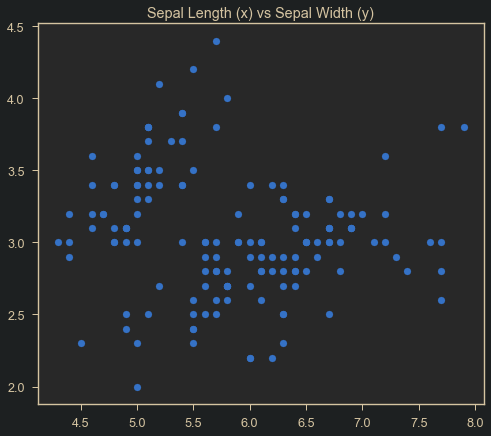

In [19]:
plt.scatter(df[df.columns[1]],df[df.columns[2]]);
plt.title("Sepal Length (x) vs Sepal Width (y)");

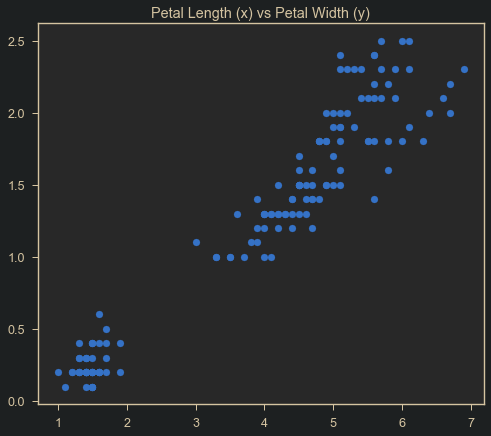

In [20]:
plt.scatter(df[df.columns[3]],df[df.columns[4]]);
plt.title("Petal Length (x) vs Petal Width (y)");

In [38]:
X = StandardScaler().fit_transform(X);
kmeans = KMeans(n_clusters=3).fit(X);
pred = kmeans.predict(X);

In [39]:
y_map = (y=='Iris-versicolor')+2*(y=='Iris-virginica');

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,rand_score
print("Accuracy: ",rand_score(y_map,pred))
print("Confusion Matrix:")
print(confusion_matrix(y_map,pred))

Accuracy:  0.8322147651006712
Confusion Matrix:
[[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]


C:\Users\R3M0\anaconda3\envs\38tfgpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


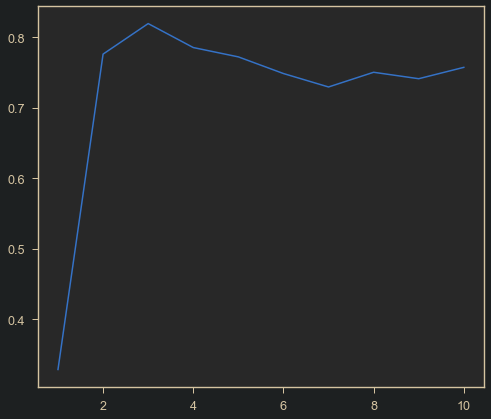

In [41]:
acc = np.zeros((10,));
for i in range(10):
    kmeans = KMeans(n_clusters=i+1).fit(X);
    pred = kmeans.predict(X);
    acc[i] = rand_score(y_map,pred);
plt.plot(np.arange(1,11),acc);

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

In [45]:
# write your code here
df = pd.read_csv(r'Iris.csv');
X = df[df.columns[1:5]].values;
y = df[df.columns[5]].values;
y_map = (y=='Iris-versicolor')+2*(y=='Iris-virginica');
X = StandardScaler().fit_transform(X);
gmm = GaussianMixture(n_components=3).fit(X);
labels = gmm.predict(X);
print("Accuracy: ",rand_score(y_map,labels))
print("Confusion Matrix:")
print(confusion_matrix(y_map,labels))

Accuracy:  0.9574944071588367
Confusion Matrix:
[[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]
